# 3 Basic Parameter Estimation Techniques

## 3.1 Discrepancy Function

To maximize the similarity between data and model predictions, the discrepancy function must be minimized. Other names for the discrepancy functions include: objective functions, cost functions, or error functions. 

The book shows some example data, which I simulated below, to create something roughly similar. In the original data, peoples recall of 60 random facts was tested on days following exposure. The x-axis was the day tested (since exposure). The y-axis was the proportion of facts retained.


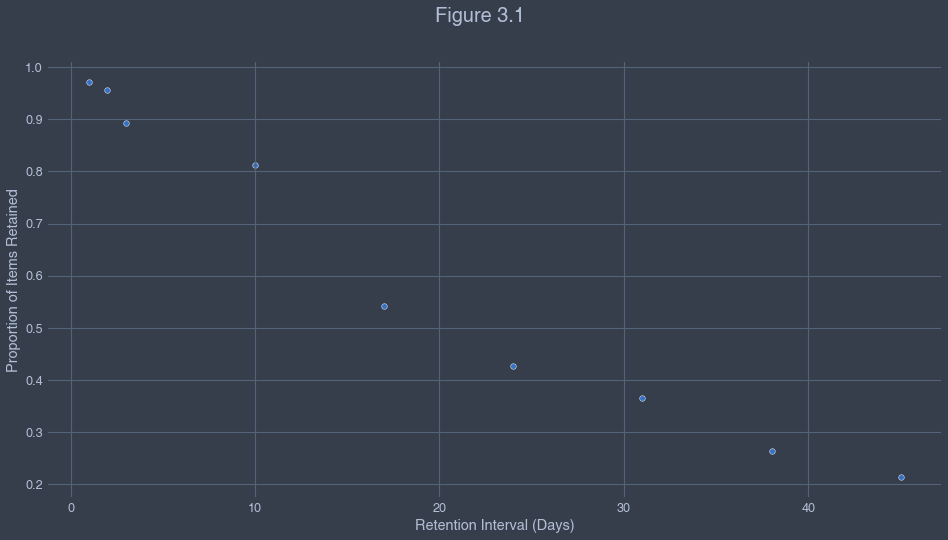

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from jupyterthemes import jtplot
jtplot.style('onedork',
             spines=False,
             figsize=(20, 10)) 

def gen_exp_decay_data(days, scale):
    '''
    Take a vector of days and return simulated data decaying exponentially
    over time with a max of 1 and min of 0. Gaussian noise is added.
    
    Parameters
    ----------
    days : numpy.ndarray
        A vector of days at which hypothetical measurements are taken
    
    scale : float, int
        Arbitrary scaling parameter.
    
    Returns
    -------
    measurements : numpy.ndarray
    '''
    basis = np.exp(-days/scale)
    noise = np.random.normal(loc=0, scale=0.03, size=len(days))
    measurements = basis + noise
    return measurements

days = np.array([1,2,3,10,17,24,31,38,45])
sim_data = gen_exp_decay_data(days, 30) # 30 roughly matches book figure 3.1

sns.scatterplot(x=days, y=sim_data)
plt.ylabel('Proportion of Items Retained')
plt.xlabel('Retention Interval (Days)')
plt.figtext(0.5, 0.95, 'Figure 3.1', wrap=True, horizontalalignment='center', fontsize=20);

The original study (Carpenter et al 2008), used power function to model the forgetting:

\begin{equation}
p = a(bt+1)^{-c}
\end{equation}

<table>
  <tr>
    <th>Parameter</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>p</td>
    <td>Predicted probability of recall</td>
  </tr>
  <tr>
    <td>t</td>
    <td>Time</td>
  </tr>
  <tr>
    <td>a</td>
    <td>Free parameter</td>
  </tr>
  <tr>
    <td>b</td>
    <td>Free parameter</td>
  </tr>
  <tr>
    <td>c</td>
    <td>Free parameter</td>
  </tr>
  
</table>


### 3.1.1 Root Mean Squared Deviation (RMSD)

RMSD is a common, simple discrepancy function. It is also known as "least-squares" as it minimizes the squared distances between data and predictions. 

<br>

\begin{equation}
  RMSD = \sqrt{\frac{ \sum_{j=1}^{J}(d_{j} - p_{j})^{2}}{J}}
\end{equation}

<br>

<table>
  <tr>
    <th>Parameter</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>J</td>
    <td>The number of data points over which the sum is taken</td>
  </tr>
  <tr>
    <td>d</td>
    <td>Vector of data points</td>
  </tr>
  <tr>
    <td>p</td>
    <td>Vector of predictions</td>
  </tr>
</table>

<br>

If the RMSD value is 0.025 for example, this means the predictions of the power forgetting model differ from the data by 2.5 % on average (in the units of measurement).

<br>

It is common to fit RMSD to group averages, (e.g means), rather than to each individual measurement. This is why $J$ is given as the denominator, rather than $N$, which is often the notation for the number of observations.

<br>

RMSD assumes data are measured on a continuous or fixed interval scale. Problems can occur, for example, when participants must respond on a 0 - 10 point scale. Neutral points like 5 -> 6 or 5-> 4 may mean something psychologically different than at extreme points 9 -> 10 or 0 -> 1.

### 3.1.2 Chi-Squared ($\chi^{2}$) and $G^{2}$

Appropriate for discrete data. For example, when the number of responses is constant but each response falls in a distinct category.

The $\chi^{2}$ is defined:

\begin{equation}
  \chi^2 = \sum_{j=1}^{J} \frac{(O_j - Np_j)^2}{Np_j}
\end{equation}

<table>
  <tr>
    <th>Parameter</th>
    <th>Definition</th>
  </tr>
  <tr>
    <td>J</td>
    <td>Number of response categories</td>
  </tr>
  <tr>
    <td>N</td>
    <td>The total number of observed responses (sample size)</td>
  </tr>
  <tr>
    <td>$O_j$</td>
    <td>The number of observed responses within each category j</td>
  </tr>
  <tr>
    <td>$p_j$</td>
    <td>Model predictions as probabilities</td>
  </tr>
</table>

<br>

Note: $\sum_{j=1}^{J}O_j = N$, and $N \times p_j$ gives predicted counts (a.k.a, expected).

<br>

The $G^2$ (a.k.a log-likelihood ratio) is defined:

\begin{equation}
  G^2 = 2\sum_{j=1}^{J}O_j\log\{O_j/(Np_j)\}
\end{equation}

<br>

They can generally be used interchangeably, however the differences are reviewed by Cressie and Read (1989).

<br>

These models are sometimes desirable as they can be interpreted as a test statistic. However in most situations, it is the *relative* fit of models is more relevant.

<br>

Caution with $\chi^2$: 
1. The number of observed/expected responses should not be bellow 5. If necessary, collapse smaller categories into larger ones.
2. Even when the degrees of freedom ($df = J - n_p -1$) is constant, increasing $N$ can increase the magnitude of $\chi^2$ as even small variations variations due to noise are amplified by a factor of $N$. This results in being overly sensitive to slight departures from predictions, when used as a statistical test.


## 3.2 Fitting Models to Data: Parameter Estimation Techniques

See page 50